In [23]:
# General libraries

from collections import defaultdict
import random
from random import randrange
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from timeit import default_timer as timer
sns.set_style('darkgrid')
plt.rcParams['figure.dpi'] = 108

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV

In [24]:
# dictionaries with the structure source -> array of followings
from sklearn.preprocessing import StandardScaler
dictionary = defaultdict(list)
# simple datafram to store the sources and the count of source followings
data = pd.DataFrame([])

file = open('data/train.txt', 'r') 
lines = file.readlines() 
count = 0
for line in lines: 
    count = count + 1
    split_string = list(map(int,line.strip().split("\t")))
    dictionary[split_string[0]] = []
    if (len(split_string) > 1):
        dictionary[split_string[0]] = sorted(split_string[1:len(split_string)])
        
    data = data.append(pd.DataFrame({'Source': split_string[0], 'Source_Followings': len(dictionary[split_string[0]]) }, index=[0]), ignore_index=True)

In [25]:
def followingInCommon(node1,node2):  
    list1 = dictionary[node1]
    list2 = dictionary[node2]  
    common_elements = set(list1).intersection(list2) 
    return len(common_elements)
    
# Test    
followingInCommon(3849054,161276) 

1137

In [26]:
real_edges = pd.read_csv("model_data/real_edges.csv", sep='\t')
fake_edges = pd.read_csv("model_data/fake_edges.csv", sep='\t')

In [27]:
real_edges['Common_Followings'] = real_edges.apply(lambda x: followingInCommon(x['Source'], x['Sink']), axis=1)

In [29]:
fake_edges['Common_Followings'] = fake_edges.apply(lambda x: followingInCommon(x['Source'], x['Sink']), axis=1)

In [7]:
#real_edges['Com_Followings_Ratio'] = real_edges['Common_Followings']/real_edges['Source_Followings']
#fake_edges['Com_Followings_Ratio'] = fake_edges['Common_Followings']/fake_edges['Source_Followings']
#real_edges['Followers_Ratio'] = real_edges['Sink_Followers']/real_edges['Source_Followers']
#fake_edges['Followers_Ratio'] = fake_edges['Sink_Followers']/fake_edges['Source_Followers']

In [8]:
#real_edges.head()

In [30]:
real_edges['Real'] = 1
fake_edges['Real'] = -1

In [10]:
#real_edges.shape
#fake_edges.shape

In [31]:
frames = [real_edges, fake_edges]
dataset = pd.concat(frames, ignore_index=True)

In [32]:
# Shuffle the data set
dataset = dataset.sample(frac=1).reset_index(drop=True)
#dataset.tail()
#dataset['Com_Followings_Ratio'] = dataset['Com_Followings_Ratio'].fillna(0)

In [34]:
dataset['Distance'] =dataset.apply(lambda x: x.Distance if x.Distance != math.inf else 2000, axis =1)

dataset = dataset.drop(columns=['Source'])
dataset = dataset.drop(columns=['Sink'])
dataset.head()
dataset.to_csv("model_data/data.csv", sep='\t', index=False)

KeyError: "['Source'] not found in axis"

In [14]:
#msk = np.random.rand(len(dataset)) < 0.8

#Y = dataset['Real']
#X = dataset.drop(columns=['Real'])
train_df, test_df = train_test_split(dataset, test_size=0.2, random_state=1)
scaler = StandardScaler()

scaler.fit(train_df.drop('Real',axis=1))
scaler.fit(test_df.drop('Real',axis=1))
X_train =scaler.transform(train_df.drop('Real',axis=1))        # fill in
Y_train =train_df.Real# fill in

X_test = scaler.transform(test_df.drop('Real',axis=1)) # fill in
Y_test = test_df.Real # fill in

# Normalization
#X = (X-X.min())/(X.max()-X.min())

#X_train = X[msk]
#X_test = X[~msk]
#Y_train = Y[msk]
#Y_test = Y[~msk]

print(len(X_test))
print(X_test)

791
[[-0.16866906 -0.27418955 -0.21673106 -0.15633447 -0.16534825]
 [-0.13067541  0.03604661  0.46217683 -0.15633447 -0.16534825]
 [-0.14503886  0.01440223 -0.26542909 -0.14962163 -0.16534825]
 ...
 [ 7.69462486 10.32434336 -0.26829368 -0.14626521 -0.16534825]
 [-0.09940016 -0.13710846 -0.2625645  -0.14962163 -0.16534825]
 [-0.17631412 -0.3391227  -0.26542909 -0.15297805 -0.16534825]]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/collections.py:886: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


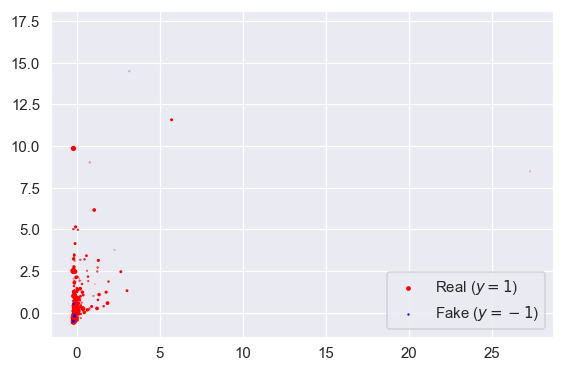

In [15]:
# plt.scatter(X_train[Y_train==1,0], X_train[Y_train==1,1], X_train[Y_train==1,2],label="Real ($y=1$)", c='r')
# plt.scatter(X_train[Y_train==-1,0], X_train[Y_train==-1,1], X_train[Y_train==-1,2],label="Fake ($y=-1$)", c='b')
# #plt.xlabel("Heart weight")
# #plt.ylabel("Body weight")
# plt.legend()
# plt.show()

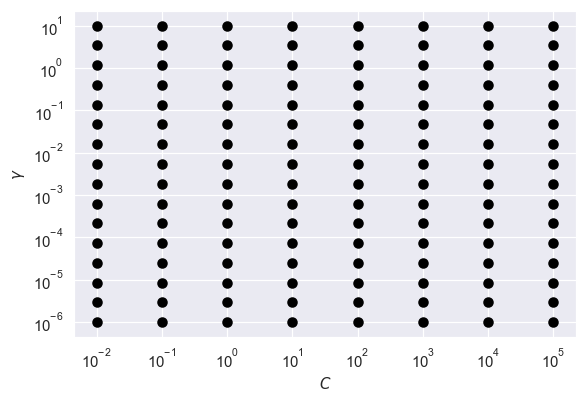

In [16]:
# C_range = np.logspace(-2, 5, 8)
# gamma_range = np.logspace(-6, 1, 16)
#
# # Visualise the grid
# xx, yy = np.meshgrid(C_range, gamma_range)
# plt.plot(xx, yy, 'ko')
# plt.xscale('log')
# plt.yscale('log')
# plt.xlabel('$C$')
# plt.ylabel(r'$\gamma$')
# plt.show()

In [17]:
#cv = StratifiedShuffleSplit(n_splits=30, test_size=0.1, random_state=1)
#grid = GridSearchCV(SVC(kernel='rbf'), param_grid={'gamma': gamma_range, 'C': C_range}, cv=cv)
#grid.fit(X_train, Y_train)
#print("The best parameters are {0.best_params_} with an accuracy of {0.best_score_:.3g}".format(grid))

KeyboardInterrupt: 

In [18]:
# Libraries for developing a Neural Network
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import to_categorical 



In [21]:
# Model arguments
args = dict(x = X_train,
            y = Y_train,
            epochs=40,
            validation_split=0.2,
            verbose=2,
            shuffle=True)

# Layer definition
input_layer = Input(shape=(7,))
hidden_layer_1 = Dense(7, activation='relu',activity_regularizer=regularizers.l1(10e-5))(input_layer)
#hidden_layer_1 = Dropout(0.3)(hidden_layer_1)
#hidden_layer_2 = Dense(8, activation='sigmoid')(hidden_layer_1)
hidden_layer_2 = Dense(7, activation='relu')(hidden_layer_1)
#hidden_layer_2 = Dropout(0.3)(hidden_layer_2)
output_layer = Dense(2, activation='softmax')(hidden_layer_2)
model = Model(inputs=input_layer, outputs=output_layer)

# Model set up
model.compile(tf.keras.optimizers.RMSprop(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 7)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 16        
Total params: 128
Trainable params: 128
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Execute training
model.fit(**args)

Epoch 1/40


ValueError: in user code:

    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:531 train_step  **
        y_pred = self(x, training=True)
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/network.py:719 call
        convert_kwargs_to_constants=base_layer_utils.call_context().saving)
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/network.py:888 _run_internal_graph
        output_tensors = layer(computed_tensors, **kwargs)
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:886 __call__
        self.name)
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer dense is incompatible with the layer: expected axis -1 of input shape to have value 7 but received input with shape [None, 5]


In [ ]:
predict = model.predict(X_test)
classes = predict.argmax(axis=-1)

In [ ]:
print(classes)

In [ ]:
print('Accuracy: ' + "{:.4f}".format(accuracy_score(Y_test, classes)))


In [ ]:
test_data = pd.read_csv("model_data/test_data.csv", sep='\t')

In [ ]:
test_data.head()

In [ ]:
test_data['Distance'] =dataset.apply(lambda x: x.Distance if x.Distance != math.inf else 2000, axis =1)

test_data['Common_Followings'] = test_data.apply(lambda x: followingInCommon(x['Source'], x['Sink']), axis=1)

In [ ]:
test_data['Com_Followings_Ratio'] = test_data['Common_Followings']/test_data['Source_Followings']
test_data['Followers_Ratio'] = test_data['Sink_Followers']/test_data['Source_Followers']
test_data['Com_Followings_Ratio'] = test_data['Com_Followings_Ratio'].fillna(0)

In [ ]:
test_data.tail()

In [ ]:

# Normalization
test_data = (test_data-test_data.min())/(test_data.max()-test_data.min())
test_data.head()

In [ ]:
predict_test = model.predict(test_data)
classes = predict_test.argmax(axis=-1)

In [ ]:
predict_test

In [ ]:
classes

In [ ]:
prediction = pd.DataFrame([])
i = 0
for row in predict_test:
    i += 1
    prediction = prediction.append(pd.DataFrame({'Id': i, 'Predicted': row[1]},
                                                index=[0]), ignore_index=True) 

In [ ]:
prediction.head()

In [ ]:
prediction.to_csv("predictions/prediction_2020-09-10.csv", sep=',', index=False)